<h1 style="color: orange;">Урок 4. Визуальный анализ данных</h1>

<h1 style="color: orange;">Условие 1: Задача 1</h1>

Постройте график  
Назовите график  
Сделайте именование оси x и оси y  
Сделайте выводы  
  
1.1. Скачать файл kc_house_data.csv - приложен на платформе  
1.2 Изучите стоимости недвижимости  
1.3 Изучите распределение квадратуры жилой  
1.4 Изучите распределение года постройки  


In [17]:
import pandas as pd
import matplotlib.pyplot as plt
df = pd.read_csv('kc_house_data.csv', sep = ',', encoding='latin-1')
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


### 1.2 Изучите стоимости недвижимости  

Text(0.5, 1.0, 'Стоимость')

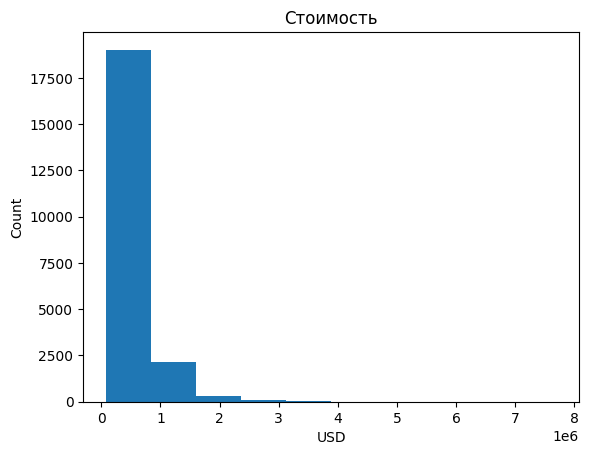

In [52]:

plt.hist(df['price'])
plt.xlabel('USD')
plt.ylabel('Count')
plt.title('Стоимость')


### 1.3 Изучите распределение квадратуры жилой

In [62]:
df['sqft_living'].value_counts().reset_index().sort_values(by='sqft_living')

,sqft_living,count
636,290,1
944,370,1
860,380,1
616,384,1
478,390,2
...,...,...
976,9640,1
1033,9890,1
803,10040,1
1002,12050,1


Text(0.5, 1.0, 'Распределение квадратуры')

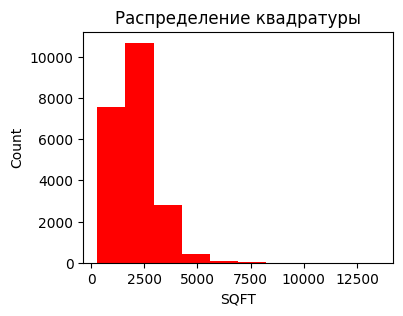

In [58]:
plt.figure(figsize=(4,3))
plt.hist(df['sqft_living'], color= 'red')
plt.xlabel('SQFT')
plt.ylabel('Count')
plt.title('Распределение квадратуры')

### 1.4 Изучите распределение года постройки 

Text(0.5, 1.0, 'Распределение квадратуры')

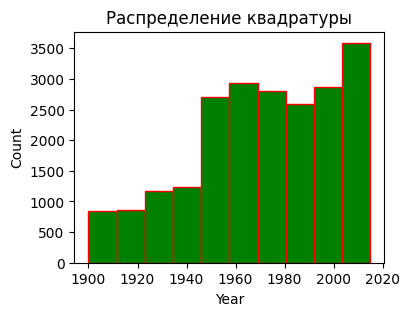

In [61]:
plt.figure(figsize=(4,3))
plt.hist(df['yr_built'], color= 'green', ec='red')
plt.xlabel('Year')
plt.ylabel('Count')
plt.title('Распределение года постройки')

<h1 style="color: orange;">Условие 2: Задача 2</h1>

### 2.1 Изучите распределение домов от наличия вида на набережную  
Постройте график  
Сделайте выводы     

In [66]:
df['waterfront'].value_counts()

waterfront
0    21450
1      163
Name: count, dtype: int64

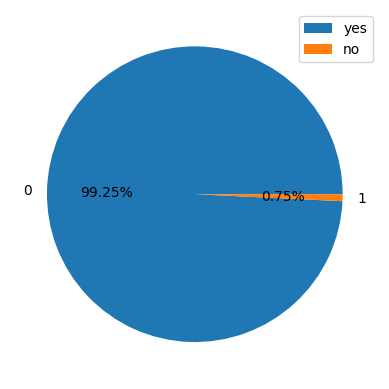

In [70]:
data = df['waterfront'].value_counts()
plt.pie(data.values, labels=data.index, autopct='%1.2f%%')
plt.legend(['yes', 'no']);

### 2.2 Изучите распределение этажей домов

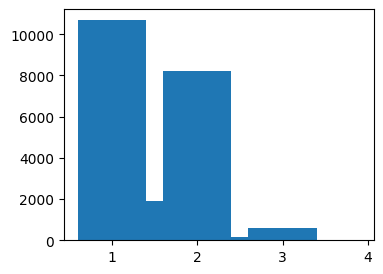

In [82]:
plt.figure(figsize=(4,3))
data = df['floors'].value_counts()
plt.bar(data.index, data.values);

In [79]:
data = df['floors'].value_counts().reset_index().sort_values(by='floors')
data

,floors,count
0,1.0,10680
2,1.5,1910
1,2.0,8241
4,2.5,161
3,3.0,613
5,3.5,8


### 2.2 Изучите распределение состояния домов 

In [84]:
data = df['condition'].value_counts().reset_index().sort_values(by='condition')
data

,condition,count
4,1,30
3,2,172
0,3,14031
1,4,5679
2,5,1701


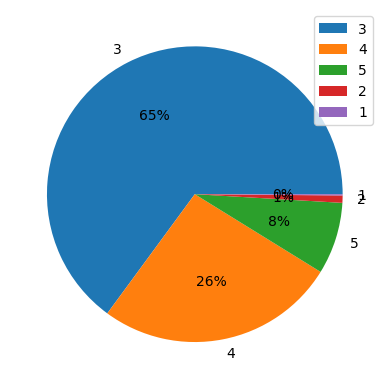

In [94]:
data = df['condition'].value_counts()
plt.pie(data.values, labels=data.index, autopct='%1.0f%%')
plt.legend(data.index)

<h1 style="color: orange;">Условие 3: Задача 3</h1>

Исследуйте, какие характеристики недвижимости влияют на стоимость недвижимости, с применением не менее 5 диаграмм из урока.
Анализ сделайте в формате storytelling: дополнить каждый график письменными выводами и наблюдениями.

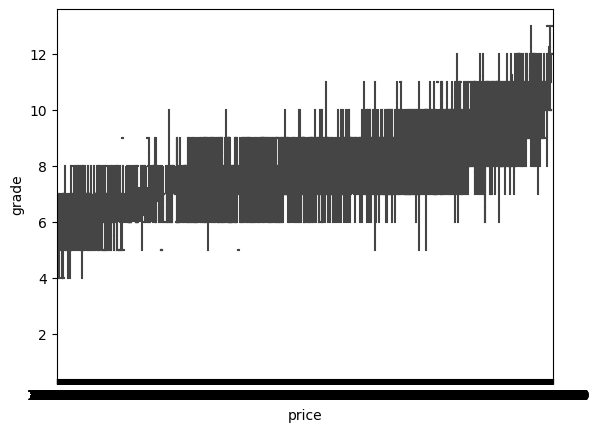

In [107]:
import seaborn as sns
sns.boxplot(x=df['price'], y=df['grade'], showfliers=False);


 я не понимаю почему получается такое безобразие

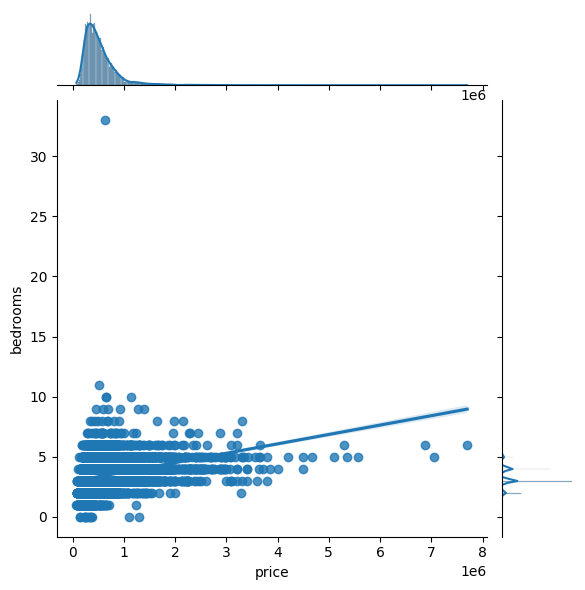

In [106]:
sns.jointplot(x=df['price'], y=df['bedrooms'], kind='reg')


По графику видно, что от количества спален есть ценовая зависимость. 

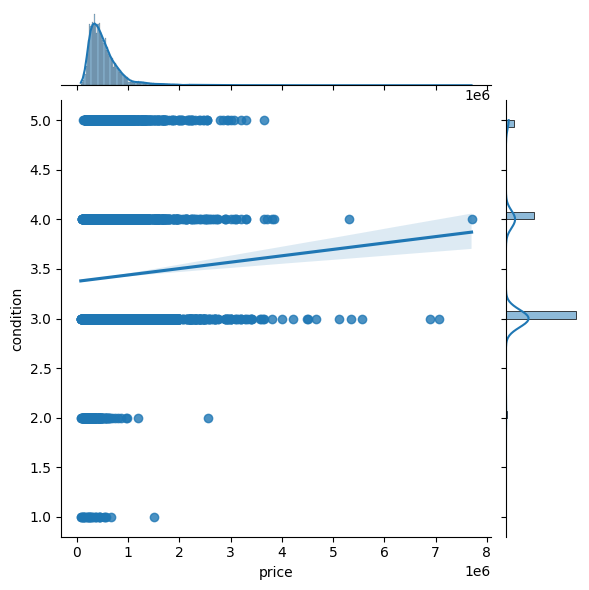

In [102]:
sns.jointplot(x=df['price'], y=df['condition'], kind='reg')